In [4]:
# Import required modules
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import re
import pprint
import glob
import pickle
import traceback
import logging
import os.path, time
from datetime import datetime, timedelta

# CSV files we have got so far

In [5]:
import os
for index,i in enumerate(sorted(os.listdir("csv/"))):
    print(index,i)

0 Business & entrepreneur.csv
1 Business & entrepreneurAuthors.csv
2 Commercial events.csv
3 Commercial eventsAuthors.csv
4 Complaints corner.csv
5 Complaints cornerAuthors.csv
6 Concerts.csv
7 ConcertsAuthors.csv
8 Daily life.csv
9 Daily lifeAuthors.csv
10 Education.csv
11 EducationAuthors.csv
12 Employment.csv
13 EmploymentAuthors.csv
14 Entertainment & dining.csv
15 Entertainment & diningAuthors.csv
16 Family mattershealth.csv
17 Family mattershealthAuthors.csv
18 Financebankingtaxation.csv
19 FinancebankingtaxationAuthors.csv
20 Food and drink.csv
21 Food and drinkAuthors.csv
22 Insurance.csv
23 InsuranceAuthors.csv
24 Introductions.csv
25 IntroductionsAuthors.csv
26 Language corner.csv
27 Language cornerAuthors.csv
28 Leaving Switzerland.csv
29 Leaving SwitzerlandAuthors.csv
30 Othergeneral.csv
31 OthergeneralAuthors.csv
32 Permitsvisasgovernment.csv
33 PermitsvisasgovernmentAuthors.csv
34 Pet corner.csv
35 Pet cornerAuthors.csv
36 Social events.csv
37 Social eventsAuthors.csv
38 

# Load all data at once

Loading thread text:

In [3]:
dfJoin={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if os.path.basename(fn).endswith('Join.csv')]
for index,filename in enumerate(filenames):
    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    dfJoin[re.sub(r'.csv','',os.path.basename(filename))]=df


Nota: Borrar Support, que está vacio

In [10]:
dfContainer={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if not os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):
    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    dfContainer[re.sub(r'.csv','',os.path.basename(filename))]=df

# sorted(dataframes)
# dataFrames = pd.Series(dataFrames)
# df=pd.read_csv('Concerts',sep='\t',index_col=0)
# df

dfContainer['Concerts'].head(2)

,hrefs,posts,replies,threads,views
0,http://www.englishforum.ch/concerts/50501-swit...,Mod Insert: Please . Can't be bothered si...,"1,100","Switzerland Gigs ""Heads Up""","149,609"
1,http://www.englishforum.ch/concerts/262772-sma...,\r\n\t\t\t\r\n\t\t\tI am living in Kanton Aar...,5,Small bars/places with acoustic livemusic?,824


In [48]:
# for index,key in enumerate(dfAuthors):
# #     print(len(dfAuthors[key].columns))
#     print(index)
#     dfAuthors[key][['topic','thread','user','views','replies','location','date','post','user_posts','since','exp','thanked','groaned','reputation']]
# dfAuthors.pop(key)


'csv/Business & entrepreneurAuthors.csv'

In [6]:
dfAuthors={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):

    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    df = df[['topic','thread','user','views','replies','location','date','post','user_posts','since','exp','thanked','groaned','reputation']]
    dfAuthors[re.sub(r'.csv','',os.path.basename(filename))]=df
print(filenames,dfAuthors.keys())

dfAuthors['ConcertsAuthors'].head(3)
# dfAuthors['Business & entrepreneurAuthors'][['thread','user','date','post','user_posts','since','exp','thanked','groaned','reputation']]

['csv/Business & entrepreneurAuthors.csv', 'csv/ConcertsAuthors.csv', 'csv/EducationAuthors.csv', 'csv/PermitsvisasgovernmentAuthors.csv', 'csv/Commercial eventsAuthors.csv', 'csv/Travelday tripsfree timeAuthors.csv', 'csv/Daily lifeAuthors.csv', 'csv/EmploymentAuthors.csv', 'csv/TransportationdrivingAuthors.csv', 'csv/Language cornerAuthors.csv', 'csv/Swiss news via The LocalAuthors.csv', 'csv/TVinternettelephoneAuthors.csv', 'csv/OthergeneralAuthors.csv', 'csv/Swiss politicsnewsAuthors.csv', 'csv/IntroductionsAuthors.csv', 'csv/Social eventsAuthors.csv', 'csv/Food and drinkAuthors.csv', 'csv/Leaving SwitzerlandAuthors.csv', 'csv/FinancebankingtaxationAuthors.csv', 'csv/Family mattershealthAuthors.csv', 'csv/InsuranceAuthors.csv', 'csv/Entertainment & diningAuthors.csv', 'csv/Complaints cornerAuthors.csv', 'csv/Pet cornerAuthors.csv', 'csv/Sports  Fitness  Beauty  WellnessAuthors.csv'] dict_keys(['EducationAuthors', 'Daily lifeAuthors', 'Swiss news via The LocalAuthors', 'EmploymentAu

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Concerts,"Switzerland Gigs ""Heads Up""",Yokine,151570,1100,Perthia,"06.05.2009, 16:20",Mod Insert: Please . Can't be bothered si...,1233.0,Mar 2006,5.0,"['901', '444']","['1', '1']",6
1,Concerts,Small bars/places with acoustic livemusic?,JHC,931,5,"Lenzburg, Aargau","19.11.2016, 19:45",\r\n\t\t\t\r\n\t\t\tI am living in Kanton Aar...,3.0,Nov 2016,0.0,"['0', '0']","['0', '0']",0
2,Concerts,Jazz clubs Zurich?,aromeroa,3849,16,Spain,"28.11.2015, 22:48",\r\n\t\t\t\r\n\t\t\tHello there! \r\nI am a...,6.0,Jul 2015,0.0,"['0', '0']","['0', '0']",0


In [5]:
# print(dfAuthors['Complaints cornerAuthors'].loc[dfAuthors['Complaints cornerAuthors']['since']=='Location: Lugano']['since'].index)
# # dfAuthors['Complaints cornerAuthors']=dfAuthors['Complaints cornerAuthors'].set_value( 'since',1642, 'null')
# wrongdata=set()
wrongdata=set()
[[wrongdata.add(key) for since in dfAuthors[key]['since'] if since=='Location: Lugano']for key in dfAuthors]
wrongdata

dfAuthors['Food and drinkAuthors'][dfAuthors['Food and drinkAuthors']['since']=='Location: Lugano']
# dfAuthors['Complaints cornerAuthors'][dfAuthors['Complaints cornerAuthors']['since']=='Location: Lugano']

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation


In [7]:
for key in wrongdata:
#     dfAuthors[key]['since']=dfAuthors[key]['since'][dfAuthors[key].since.replace('Location: Lugano' , 'null')]
    ids=dfAuthors[key][dfAuthors[key]['since']=='Location: Lugano'].index
    dfAuthors[key]=dfAuthors[key].loc[dfAuthors[key].index ^ ids].reset_index()
    dfAuthors[key].drop('index',axis=1,inplace=True)
dfAuthors['Complaints cornerAuthors'].head(2)
# dfAuthors['Complaints cornerAuthors']=dfAuthors['Complaints cornerAuthors'][dfAuthors['Complaints cornerAuthors'].index!= ids]
# dfAuthors['Complaints cornerAuthors'].loc[1641:1645]

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Complaints corner,Ricardo-wrong product delivered,NaN,969,47,Zürich,"05.01.2017, 16:40",Actually it sounds more like opinions on a...,3727.0,Oct 2007,6.0,"['385', '202']","['1', '178', '756']",m
1,Complaints corner,the great Swisscom cock pit bilk,armed_neutrality,267,8,Vaud,"19.1.2017, 14:59",English is not your native language then?\...,114.0,May 2014,3.0,"['7', '2']","['101', '52']",4


Clean and transform data

In [44]:
# # Casting views from str to int (- to 0 because is a moved)
today=datetime.strptime(time.ctime(os.path.getctime('csv/ConcertsAuthors.csv')),'%a %b %d %H:%M:%S %Y')
yesterday=today- timedelta(days=1)
tdy="%d.%d.%d" %(today.day,today.month,today.year)
ystr="%d.%d.%d" %(yesterday.day,yesterday.month,yesterday.year)

for key in dfContainer:
    dfContainer[key]['views']=dfContainer[key]['views'].apply(lambda x: str(x).replace(',',''))
    dfContainer[key]['replies']=dfContainer[key]['replies'].apply(lambda x: str(x).replace(',',''))
print(filenames)
# for key in dfAuthors:
# #     dfAuthors[key].user_posts=dfAuthors[key].apply(lambda x: x[9].replace('Posts: ','').replace(',','').replace('-','0') ,axis=1)
# #     [print(key) for x in dfAuthors[key]['since'] if 'Location: Lugano' in x]
# #     dfAuthors[key]['views']=dfAuthors[key]['views'].apply(lambda x: int(x.replace(',','').replace('-','0')))
# #   dfAuthors[key]['replies']=dfAuthors[key]['replies'].apply(lambda x: int(str(x).replace(',','').replace('-','0')))
#     dfAuthors[key]['user_posts']=dfAuthors[key]['user_posts'].apply(lambda x: ''.join(re.findall(r'\d+',x)))
#     dfAuthors[key]['user']=dfAuthors[key]['user'].apply(lambda x: str(x).replace(str(x)[0],'') if((str(x)[0])=='"') else str(x))
#     dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: str(x))
#     dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: x.replace('null',("1.1.0001, 00:00")))
#     dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: x.replace('Yesterday',ystr))
#     dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: x.replace('Today',tdy))
# #     dfAuthors[key]['date']=[datetime.strptime(x, '%d.%m.%Y, %H:%M')for x in dfAuthors[key]['date'] if (x!='null')]
#     dfAuthors[key]['since']=dfAuthors[key]['since'].apply(lambda x: str(x))
#     dfAuthors[key]['since']=dfAuthors[key]['since'].apply(lambda x: x.replace('Join Date:',''))
#     dfAuthors[key]['since']=dfAuthors[key]['since'].apply(lambda x: x.replace('null',(" Jun 0001")))
# #     dfAuthors[key]['since']=[datetime.strptime(x, ' %b %Y')for x in dfAuthors[key]['since']]
#     dfAuthors[key]['location']=dfAuthors[key]['location'].apply(lambda x: x.replace('Location: ',''))
# dfAuthors[key].head()
# # print(filenames)


['csv/Social events.csv', 'csv/Commercial events.csv', 'csv/TVinternettelephone.csv', 'csv/Swiss politicsnews.csv', 'csv/Swiss news via The Local.csv', 'csv/Education.csv', 'csv/Financebankingtaxation.csv', 'csv/Language corner.csv', 'csv/Travelday tripsfree time.csv', 'csv/Introductions.csv', 'csv/Pet corner.csv', 'csv/Employment.csv', 'csv/Permitsvisasgovernment.csv', 'csv/Transportationdriving.csv', 'csv/Insurance.csv', 'csv/Business & entrepreneur.csv', 'csv/Sports  Fitness  Beauty  Wellness.csv', 'csv/Family mattershealth.csv', 'csv/Food and drink.csv', 'csv/Complaints corner.csv', 'csv/Othergeneral.csv', 'csv/Leaving Switzerland.csv', 'csv/Concerts.csv', 'csv/Entertainment & dining.csv', 'csv/Daily life.csv']


Reputation transformation. Basic transformation:

In [10]:
print('Reputation values: ',dfAuthors['Business & entrepreneurAuthors']['reputation'].unique())
d = {}
d["a reputation beyond repute"] = 6 # 
d["an excellent reputation"] = 5 # 
d["considered knowledgeable"] = 4 #
d["earned the respect of many"] = 3 #
d["earned some respect"] = 2#
d["made some interesting contributions"] = 1 #
d["no particular reputation at present"] = 0#1
d["slipped a little"] = -1 #0
d["become a little unpopular"] = -2 #
d["annoyed a few people around here"] = -3 #
d["considered a nuisance"] = -4 #
d["considered unworthy"] = -5 #
d["null"] = np.nan


# for key in dfAuthors:
# #     print(key)
#     for i in dfAuthors[key]['reputation'].unique():
#         uniques.add(i)
#     dfAuthors[key]['reputation']=dfAuthors[key]['reputation'].apply(lambda x: d[x] if(len(str(x))>3) else np.nan)
# # dfAuthors['EducationAuthors'].head()
# print('all rep values',uniques)


Reputation values:  ['6' '0' '-2' '2' '-1' '1' '4' '3' nan '-3' '-5' '5' '-4' 'u' 'a']


In [31]:
uniques=set()
[[uniques.add(user_exp) for user_exp in dfAuthors[key]['reputation'] if user_exp not in list(d.keys())]for key in dfAuthors]
uniques

{nan, 'u', 'h', 'a', 'm'}

In [11]:
# temp=map(d.get, dfAuthors['EducationAuthors']['reputation'], dfAuthors['EducationAuthors']['reputation'])
for key in dfAuthors:
    dfAuthors[key]['reputation']=[d.get(item,item)  for item in dfAuthors[key]['reputation']]
dfAuthors['Business & entrepreneurAuthors'].head()


,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,mark,17624,0,"Zollikon, Switzerland","11.08.2006, 15:44",\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,3070.0,May 2005,8.0,"['3', '3']","['418', '115']",6
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,Nano,139,2,Solothurn,"18.1.2017, 23:08",\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,2.0,Jan 2017,0.0,"['0', '0']","['0', '0']",0
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,Richard,60525,319,Luzern currently,"13.07.2007, 12:23",I can imagine they would try and avoid doi...,2565.0,May 2005,6.0,"['4', '4']","['720', '373']",6
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],vulcan29,3647,26,uk,"30.08.2014, 01:13","\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",12.0,Aug 2014,1.0,"['0', '0']","['1', '1']",0
4,Business & entrepreneur,importing goods,swissv,225,2,Zurich,"02.01.2017, 14:43",\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,5.0,Dec 2016,0.0,"['0', '0']","['0', '0']",0


In [12]:
print('Reputation values: ',dfAuthors['EducationAuthors']['exp'].unique())
# Basic exp
d = {}
d["Newbie"] = 0 # 
d["Newbie 1st class"] = 1 #
d["Junior Member"] = 2 #
d["Member"] = 3#
d["Senior Member"] = 4 #
d["Forum Veteran"] = 5#1
d["Forum Legend"] = 6 #0
d["Commercial paid-placement ads"] = 7 # 
d["Banned"] = -1 #
d["null"] = np.nan #

Reputation values:  [  7.   6.  nan   0.   1.  -1.   5.   3.   4.   2.   8.]


There are some special rols:

In [39]:
other_rols=set()
[[other_rols.add(user_exp) for user_exp in dfAuthors[key]['exp'] if user_exp not in list(d.keys())]for key in dfAuthors]
other_rols

Because they aren't so many of them. We will parse them manually. 

In [35]:
# dfAuthors['EducationAuthors'].head()
d["A singular modality"] = 8 # Special rol
d["Moderately Amused"] = 8 # Special rol
d["Only in moderation"] = 8 # Special rol
d["The Architect"] = 8 # Special rol
d["Unbridled Mod"] = 8 # Special rol
d["à la mod"] = 8 #
d["RIP"] = 8 # Special rol
d["Moddy McModface"] = 8 # Special rol
d["Moderato espressivo"] = 8 # Special rol
d["modified and reprogrammed"] = 8 #

# temp=map(d.get, dfAuthors['EducationAuthors']['reputation'], dfAuthors['EducationAuthors']['reputation'])
for key in dfAuthors:
    dfAuthors[key]['exp']=[d.get(item,item)  for item in dfAuthors[key]['exp']]
# dfAuthors['Complaints cornerAuthors'][(dfAuthors['Complaints cornerAuthors']['exp']=='Join Date: Dec 2009')]
print('Exp values: ',dfAuthors['Complaints cornerAuthors']['exp'].unique())
print('Exp values: ',dfAuthors['Business & entrepreneurAuthors']['exp'].unique())


Exp values:  [  6.   3.   5.   2.  nan   4.   8.   0.   1.  -1.]
Exp values:  [  8.   0.   6.   1.   2.   4.   5.   3.  nan  -1.]


Thanked and groaned parse

In [36]:
# Thanked 418 Times in 115 
# Groaned at 3 Times in 3 Posts
for key in dfAuthors:
    dfAuthors[key]['groaned']=dfAuthors[key]['groaned'].apply(lambda x: re.findall(r'\d+',x))
    dfAuthors[key]['thanked']=dfAuthors[key]['thanked'].apply(lambda x: re.findall(r'\d+',x))
dfAuthors['Business & entrepreneurAuthors'].head()

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,mark,17624,0,"Zollikon, Switzerland","11.08.2006, 15:44",\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,3070,May 2005,8.0,"[3, 3]","[418, 115]",6
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,Nano,139,2,Solothurn,"18.1.2017, 23:08",\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,2,Jan 2017,0.0,"[0, 0]","[0, 0]",0
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,Richard,60525,319,Luzern currently,"13.07.2007, 12:23",I can imagine they would try and avoid doi...,2565,May 2005,6.0,"[4, 4]","[720, 373]",6
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],vulcan29,3647,26,uk,"30.08.2014, 01:13","\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",12,Aug 2014,1.0,"[0, 0]","[1, 1]",0
4,Business & entrepreneur,importing goods,swissv,225,2,Zurich,"02.01.2017, 14:43",\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,5,Dec 2016,0.0,"[0, 0]","[0, 0]",0


In [37]:
dfAuthors['Business & entrepreneurAuthors'].head()

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,mark,17624,0,"Zollikon, Switzerland","11.08.2006, 15:44",\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,3070,May 2005,8.0,"[3, 3]","[418, 115]",6
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,Nano,139,2,Solothurn,"18.1.2017, 23:08",\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,2,Jan 2017,0.0,"[0, 0]","[0, 0]",0
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,Richard,60525,319,Luzern currently,"13.07.2007, 12:23",I can imagine they would try and avoid doi...,2565,May 2005,6.0,"[4, 4]","[720, 373]",6
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],vulcan29,3647,26,uk,"30.08.2014, 01:13","\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",12,Aug 2014,1.0,"[0, 0]","[1, 1]",0
4,Business & entrepreneur,importing goods,swissv,225,2,Zurich,"02.01.2017, 14:43",\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,5,Dec 2016,0.0,"[0, 0]","[0, 0]",0


# Plotting
We will first transform our string data to integers, so we can plot it. Then we will join al interesting data in a df and obtain general statistical information.

In [27]:
# Run it just ones.
for key in dfAuthors:
    dfAuthors[key]['views']=dfAuthors[key]['views'].apply(lambda x: int(x.replace(',','').replace('-','0')) if type(x)== str else x)
    dfAuthors[key]['replies']=dfAuthors[key]['replies'].apply(lambda x: int(str(x).replace(',','').replace('-','0'))if type(x)== str else x)
dfAuthors[key].head(2)

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Entertainment & dining,Ramen in Zurich,honiebee,2022,9,Zurich,"05.10.2015, 02:59","\r\n\t\t\t\r\n\t\t\t+1 for Miki, almost like ...",9.0,Sep 2014,0.0,"['0', '0']","['0', '0']",0
1,Entertainment & dining,All you can eat buffet in Geneva?,d0r1an,1929,18,Bienne-venue,"08.08.2015, 12:07",\r\n\t\t\t\r\n\t\t\tLe Furet is great!! Make...,14.0,Jul 2011,1.0,"['1', '1']","['5', '4']",-4


In [29]:
moreViews=pd.DataFrame()
Views=pd.DataFrame()
viewsStats=pd.DataFrame()
repliesStats=pd.DataFrame()
for index,key in enumerate(dfAuthors):
#     dfContainer[key].views=dfContainer[key].apply(lambda x: int(x[4].replace(',','').replace('-','0')),axis=1)
    viewsStats[key]=dfAuthors[key].describe()['views']
    repliesStats[key]=dfAuthors[key].describe()['replies']
    temp=dfAuthors[key][['thread','views']]
    temp2=temp.sort_values('views',ascending=0)[:4]['views']
    temp2.index=[np.arange(4)]
    Views[key]=temp2
    temp=temp.sort_values('views',ascending=0)[:4]
    temp['index2']=key
    temp.index=[temp.index2,temp.thread]
    temp=temp.drop(['index2','thread'],1)
    moreViews=moreViews.append(temp)


/home/josele/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


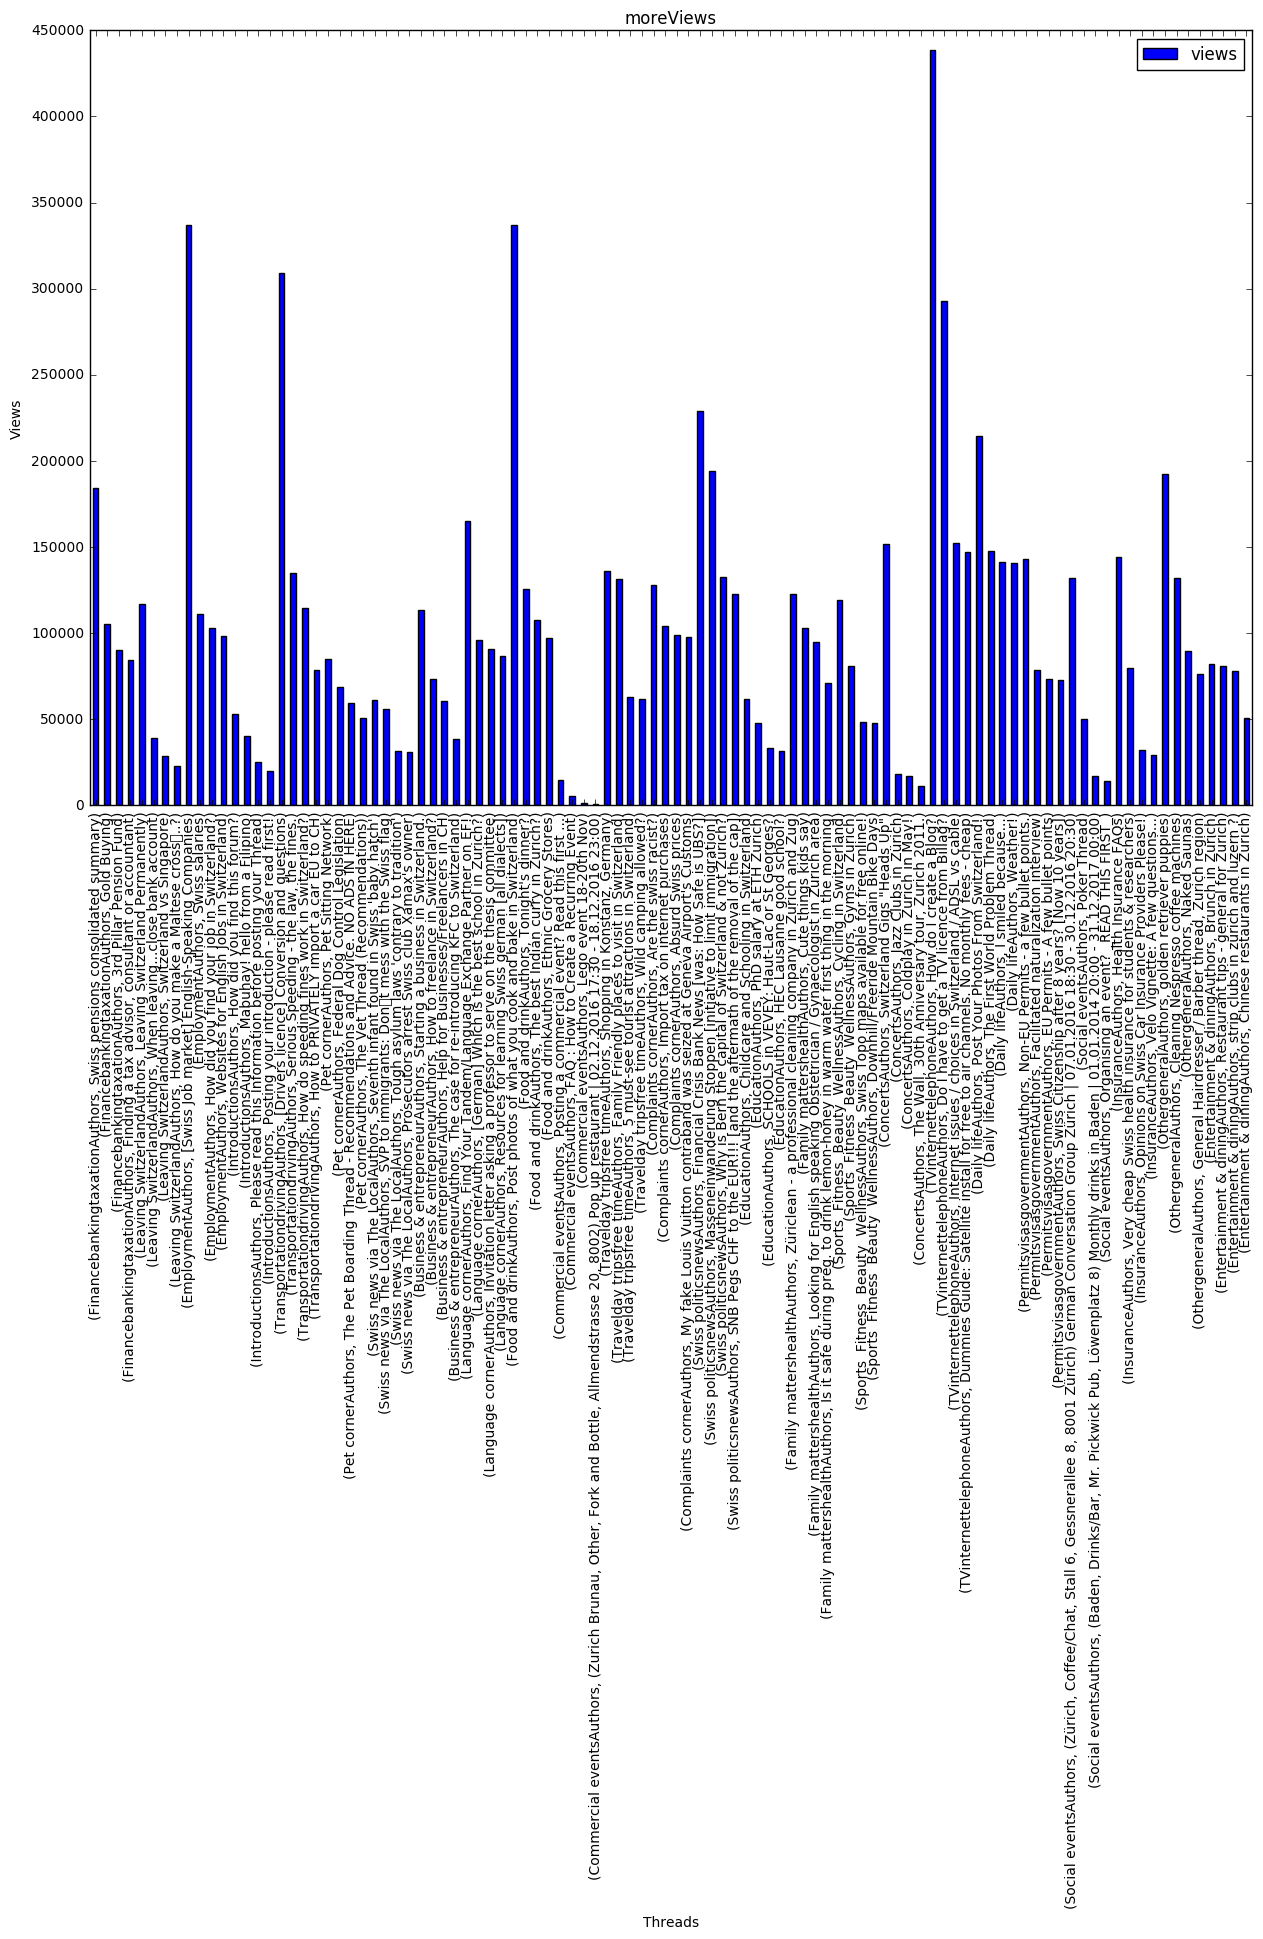

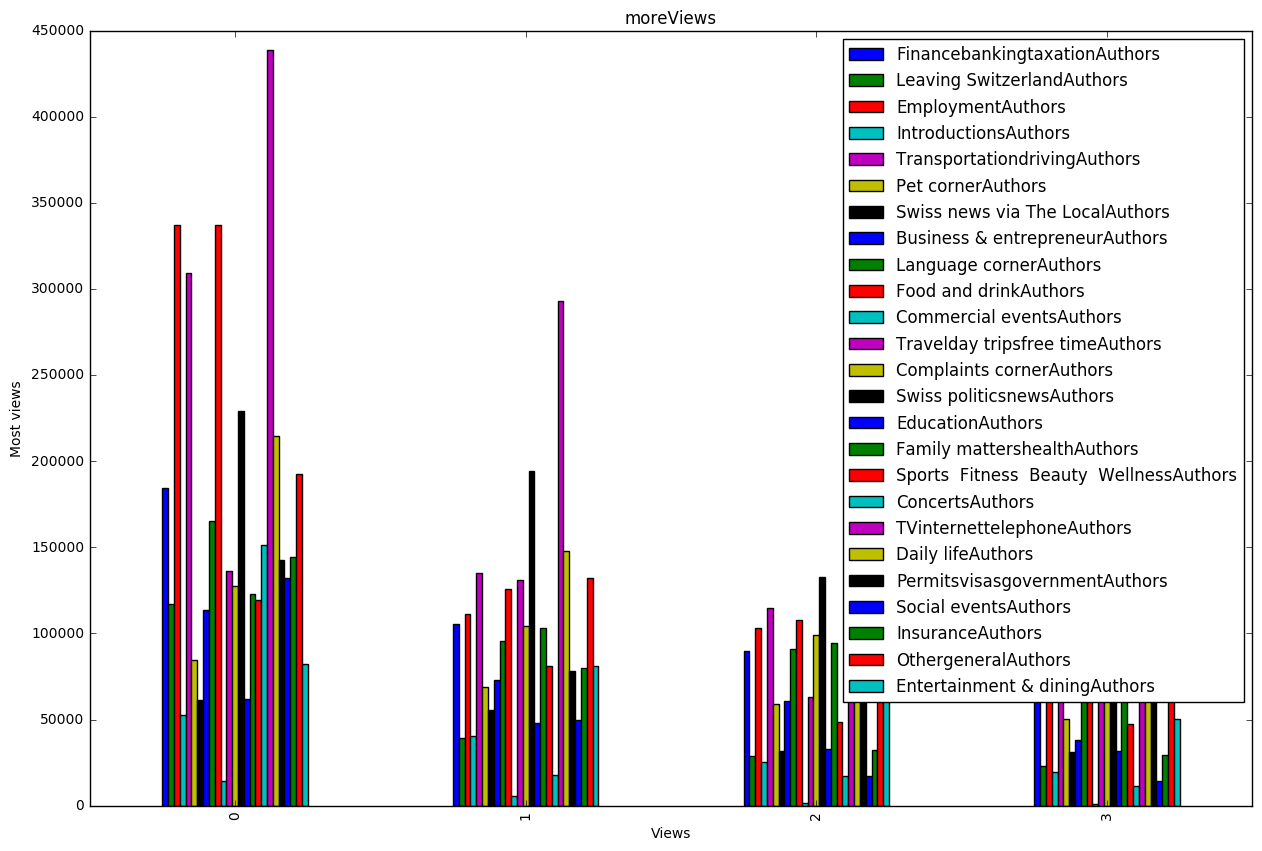

views
index2                          thread                                                    
FinancebankingtaxationAuthors   Swiss pensions consolidated summary                 184224
                                Gold Buying                                         105543
                                3rd Pillar Pension Fund                              89934
                                Finding a tax advisor, consultant or accountant      84466
Leaving SwitzerlandAuthors      Leaving Switzerland Permanently                     117144
                                When leaving...close bank account                    39045
                                Switzerland vs Singapore                             28713
                                How do you make a Maltese cross
..?                  22746
EmploymentAuthors               [Swiss Job market] English-Speaking Companies       337121
                                Swiss salaries                                      111274
                                How did you find your job in Switzerland?           102890
                                Websites for English Jobs in Switzerland             98560
IntroductionsAuthors            How did you find this forum?                         52843
                                Mabuhay! hello from a Filipino                       40185
                                Please read this Information before posting you...   25248
                                Posting your introduction - please read first!       19805
TransportationdrivingAuthors    [Drivers licence] Conversion and questions          309410
                                Serious Speeding - the law, the fines.              134880
                                How do speeding fines work in Switzerland?          114590
                                How to PRIVATELY import a car EU to CH               78660
Pet cornerAuthors               Pet Sitting Network                                  84787
                                Federal Dog Control Legislation                      68694
                                The Pet Boarding Thread - Recommendations and A...   59205
                                The Vet Thread (Recommendations)                     50536
Swiss news via The LocalAuthors Seventh infant found in Swiss 'baby hatch'           61076
                                SVP to immigrants: Dont mess with the Swiss flag    55803
                                Tough asylum laws 'contrary to tradition'            31703
                                Prosecutors arrest Swiss club Xamax's owner          31121
Business & entrepreneurAuthors  Starting a business in Switzerland.                 113495
                                How to freelance in Switzerland?                     73205
...                                                                                    ...
ConcertsAuthors                 Coldplay in Zurich in May!                           17051
                                The Wall, 30th Anniversary tour, Zurich 2011.        11534
TVinternettelephoneAuthors      How do I create a Blog?                             438685
                                Do I have to get a TV licence from Billag?          292818
                                Internet issues / choices in Switzerland / ADSL...  152376
                                Dummies Guide: Satellite install for free to ai...  147100
Daily lifeAuthors               Post Your Photos From Switzerland!                  214706
                                The First World Problem Thread                      147899
                                I smiled because...                                 141082
                                Weather!                                            140840
PermitsvisasgovernmentAuthors   Non-EU Permits - a few bullet points.               142892
                                Facilitated naturalization interview             

In [30]:
# temp=dfContainer['Business & entrepreneur'][['threads','views']]
# temp=temp.sort_values('views',ascending=0)
# temp2=temp[:3].append(temp[3:4])
# temp2['index2']='a'
# temp2.index=[temp2.index2,np.arange(4)]
# temp2.drop('index2',1)
# temp3=temp[4:8]
# temp3['index2']='b'
# temp3.index=[temp3.index2,np.arange(4)]
# temp2.append(temp3)
moreViews.plot.bar(figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Threads')
plt.ylabel('Views')
Views.plot(kind='bar',figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Views')
plt.ylabel('Most views')
plt.show()
Views
moreViews

In [31]:
viewsStats

,FinancebankingtaxationAuthors,Leaving SwitzerlandAuthors,EmploymentAuthors,IntroductionsAuthors,TransportationdrivingAuthors,Pet cornerAuthors,Swiss news via The LocalAuthors,Business & entrepreneurAuthors,Language cornerAuthors,Food and drinkAuthors,...,Family mattershealthAuthors,Sports Fitness Beauty WellnessAuthors,ConcertsAuthors,TVinternettelephoneAuthors,Daily lifeAuthors,PermitsvisasgovernmentAuthors,Social eventsAuthors,InsuranceAuthors,OthergeneralAuthors,Entertainment & diningAuthors
count,5776.000000,1011.000000,6206.000000,13379.000000,7881.000000,2627.000000,1150.000000,2117.000000,3028.000000,4247.000000,...,7284.000000,5664.000000,848.000000,5556.000000,11390.000000,7365.000000,17.000000,1959.000000,8187.000000,1729.000000
mean,2808.274931,2575.684471,2881.488237,954.654982,2537.295140,2284.330034,1129.997391,2282.867737,2682.833554,3312.573581,...,2713.388797,2132.431321,1615.056604,2934.446364,3148.928183,1911.913781,14733.235294,2416.063298,2730.984488,3313.116252
std,5025.480927,4708.098245,6447.636503,1060.230704,5405.366332,3488.195834,3194.108654,3858.961418,5792.833416,6931.852145,...,4086.472894,3542.596680,5311.663414,8780.454169,5914.934703,3338.595089,32585.474601,4407.505635,4930.084400,5277.330614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,166.000000,0.000000,0.000000,0.000000
25%,1044.750000,1088.000000,1048.000000,569.000000,907.000000,966.500000,445.250000,1045.000000,928.750000,1174.000000,...,987.000000,763.750000,919.000000,984.750000,947.000000,820.000000,593.000000,1122.500000,940.000000,1145.000000
50%,1641.500000,1620.000000,1619.500000,725.000000,1457.000000,1463.000000,543.000000,1489.000000,1420.000000,2026.000000,...,1652.000000,1209.000000,1153.500000,1536.500000,1648.500000,1220.000000,2514.000000,1629.000000,1514.000000,1801.000000
75%,2884.500000,2614.000000,2885.750000,998.000000,2655.000000,2493.000000,745.000000,2424.000000,2533.000000,3715.500000,...,2999.000000,2232.750000,1518.250000,2762.250000,3307.000000,2017.000000,10392.000000,2572.500000,2777.000000,3395.000000
max,184224.000000,117144.000000,337121.000000,52843.000000,309410.000000,84787.000000,61076.000000,113495.000000,165236.000000,336871.000000,...,122699.000000,119106.000000,151570.000000,438685.000000,214706.000000,142892.000000,132178.000000,144466.000000,192340.000000,82366.000000


In [32]:
repliesStats

,FinancebankingtaxationAuthors,Leaving SwitzerlandAuthors,EmploymentAuthors,IntroductionsAuthors,TransportationdrivingAuthors,Pet cornerAuthors,Swiss news via The LocalAuthors,Business & entrepreneurAuthors,Language cornerAuthors,Food and drinkAuthors,...,Family mattershealthAuthors,Sports Fitness Beauty WellnessAuthors,ConcertsAuthors,TVinternettelephoneAuthors,Daily lifeAuthors,PermitsvisasgovernmentAuthors,Social eventsAuthors,InsuranceAuthors,OthergeneralAuthors,Entertainment & diningAuthors
count,5776.000000,1011.000000,6206.000000,13379.000000,7881.000000,2627.000000,1150.000000,2117.000000,3028.000000,4247.000000,...,7284.000000,5664.000000,848.000000,5556.000000,11390.000000,7365.000000,17.000000,1959.000000,8187.000000,1729.000000
mean,11.777181,11.321464,11.862391,6.495926,13.090725,13.398173,4.777391,9.912612,10.430978,19.335060,...,14.832098,8.981638,5.176887,13.285277,23.040825,8.928038,51.941176,10.202654,10.842311,10.812608
std,27.032577,21.088839,19.089089,10.292168,26.993443,20.920365,19.061191,24.554912,24.720095,58.180227,...,31.402315,26.565776,38.642085,41.117808,58.916850,16.542621,113.832921,17.112297,21.558548,21.565003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,4.000000,...,2.000000,1.000000,0.000000,2.000000,3.000000,2.000000,0.000000,3.000000,2.000000,1.000000
50%,6.000000,5.000000,6.000000,4.000000,6.000000,7.000000,0.000000,5.000000,4.000000,9.000000,...,6.000000,3.000000,1.000000,6.000000,9.000000,5.000000,3.000000,6.000000,5.000000,4.000000
75%,13.000000,12.000000,14.000000,8.000000,15.000000,17.000000,1.000000,11.000000,11.000000,22.000000,...,15.000000,9.000000,4.000000,13.000000,24.000000,11.000000,42.000000,12.000000,12.000000,11.000000
max,1126.000000,249.000000,453.000000,462.000000,1378.000000,400.000000,280.000000,770.000000,747.000000,2766.000000,...,1016.000000,838.000000,1100.000000,1543.000000,2607.000000,644.000000,445.000000,403.000000,632.000000,320.000000


# Obj Saver
This will be excluded from GitHub beacuse of the objs sizes.

In [ ]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop = set(stopwords.words('english'))
stop.update([".",",","?",")","(",":","/","!","%","-",""])
stop.update(STOPWORDS)

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
wnl = WordNetLemmatizer()
forumTextContainer={}
i=0
for key in dfAuthors:
    temp=dfAuthors[key][['thread','post']]
    lista=[]
    print(i)
    print("There are %s null values" %temp.isnull().values.sum())
    temp=temp.dropna()
    for index,thread in temp.iterrows():
        allwords=[]
#         if not type(thread[1])==float: # moved thread or privated
        text_tk = nltk.word_tokenize(thread['post']) 
        word_tag_fd = nltk.pos_tag(text_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
        for wt in word_tag_fd:
            if  (wt[0] not in stop) and (wt[1] == 'NOUN' or wt[1] == 'ADJ'):
                allwords.append(wnl.lemmatize(wt[0]))
            elif (wt[0] not in stop) and (wt[1] == 'VERB'):
                allwords.append(wnl.lemmatize(wt[0],'v'))
                        
#         allwords=[wnl.lemmatize(wt[0]) for wt in word_tag_fd if  (wt[0] not in stop) and (wt[1] == 'NOUN' or wt[1] == 'ADJ')]
          
    #         allnoun=[wt[0] for wt in word_tag_fd if (wt[1] == 'NOUN' and wt[0] not in stop)] 
    #         # We want to do a wordcloud just of the nouns
    #         allverb=[wt[0] for wt in word_tag_fd if (wt[1] == 'VERB'and wt[0] not in stop)]
        if(len(allwords)>3): # We remove irrelevant posts
            lista.append((thread['thread'],allwords))
           
    forumTextContainer[key]=(lista)
    i+=1
# print(temp.loc[2].threads)
# word_c=WordCloud()
# wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate(pd.Series(allnoun).str.cat(sep=' '))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()
save_obj(forumTextContainer, 'forumTextContainer') 



0
There are 0 null values
1
There are 0 null values
2
There are 0 null values
3
There are 0 null values
4
There are 0 null values
5
There are 0 null values
6
There are 0 null values
7
There are 0 null values
8
There are 0 null values
9
There are 0 null values
10
There are 0 null values
11
There are 0 null values
12
There are 0 null values
13
There are 0 null values
14
There are 0 null values
15
There are 0 null values
16
There are 0 null values
17
There are 61 null values
18
There are 0 null values
19
There are 0 null values
20
There are 0 null values
21
There are 0 null values
22
There are 0 null values
23
There are 0 null values
24
There are 0 null values


NameError: name 'save_obj' is not defined

## Loading TK

In [30]:
# Loading threads tk
forumTextContainer=load_obj('forumTextContainer')

dict_keys(['FinancebankingtaxationAuthors', 'Leaving SwitzerlandAuthors', 'EmploymentAuthors', 'IntroductionsAuthors', 'TransportationdrivingAuthors', 'Pet cornerAuthors', 'Swiss news via The LocalAuthors', 'Business & entrepreneurAuthors', 'Language cornerAuthors', 'Daily lifeAuthors', 'Commercial eventsAuthors', 'Travelday tripsfree timeAuthors', 'OthergeneralAuthors', 'Swiss politicsnewsAuthors', 'EducationAuthors', 'Family mattershealthAuthors', 'Sports  Fitness  Beauty  WellnessAuthors', 'ConcertsAuthors', 'TVinternettelephoneAuthors', 'Food and drinkAuthors', 'PermitsvisasgovernmentAuthors', 'Social eventsAuthors', 'InsuranceAuthors', 'Complaints cornerAuthors', 'Entertainment & diningAuthors'])


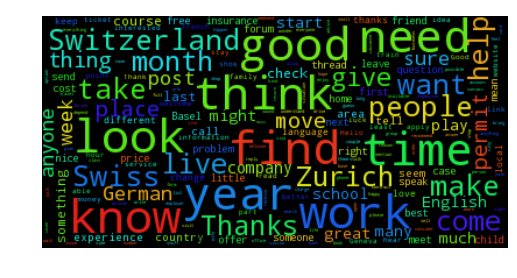

'Entertainment & diningAuthors'

In [115]:
# forumTextContainer['Education'][0]
from collections import defaultdict
from nltk.probability import ConditionalFreqDist
from gensim import corpora, models, similarities
from gensim.models import  ldamodel
frequency = defaultdict(int)
# Counting the freq of the words in a topic. (stopwords already done)
print(forumTextContainer.keys())
for key in forumTextContainer:
    for thread in forumTextContainer[key]:
        for token in thread[1]:
            if len(token)>3:
                frequency[token] += 1
    # [(k, frequency[k]) for k in sorted(frequency, key=frequency.get, reverse=True)]
    words=[(k, frequency[k]) for k in sorted(frequency, key=frequency.get, reverse=True)]
    word_c=WordCloud()
    wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate_from_frequencies(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(('wordcloud/'+key+'.png'))
plt.show()
key

## Topic modeling for threads

In [118]:
pp=pprint.PrettyPrinter(compact=1)
frequency = defaultdict(int)
# Here, we will count the frequency of the words in all the topic
for thread in forumTextContainer['EducationAuthors']:
    for token in thread[1]:
        if len(token)>3:
            frequency[token] += 1
# Now, we will remove words that have a small value of freq compared with the length of the thread.
# We also organize our tokens in a list per thread
texts = [[token for token in threads[1] if frequency[token]> math.ceil(len(threads[1])/15)] # The really huge topics are reduced
         for threads in forumTextContainer['EducationAuthors']]

dictionary = corpora.Dictionary(texts)
print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf[corpus]
print("Number of threads: %d"%len(corpus))

Dictionary(1698 unique tokens: ['pre-school', 'prefer', 'Local', 'move', 'Little']...)
Number of threads: 1239


In [119]:
lsi = models.LsiModel(corpus_tfidf,id2word=dictionary, num_topics=10)

topics=[" ".join(re.findall("\"[a-z]+\"",topic[1])) for topic in lsi.print_topics(10,20)]
[(print("topic %d: %s \n" %(i,topic)) ) for (i,topic) in enumerate(topics)]

topic 0: "school" "child" "year" "know" "language" "local" "class" "need" "work" "look" "good" "teacher" "find" "think" "experience" "start" 

topic 1: "school" "child" "study" "course" "program" "anyone" "local" "class" "look" "find" "university" "know" "year" "teacher" "information" "degree" "apply" 

topic 2: "school" "language" "anyone" "course" "teach" "experience" "speak" "know" "information" "share" "learn" "child" "move" 

topic 3: "anyone" "speak" "university" "work" "look" "student" "language" "study" "thanks" "daughter" "native" "program" "year" 

topic 4: "school" "anyone" "daughter" "study" "find" "thanks" "offer" "post" "course" "public" "time" "help" "thing" "university" "teacher" "experience" 

topic 5: "anyone" "information" "year" "school" "good" "work" "look" "luck" "class" "link" "study" "daughter" "post" 

topic 6: "look" "teacher" "class" "year" "move" "know" "place" "area" "start" "think" "daughter" "live" "teach" "month" "answer" "post" 

topic 7: "year" "good" 

[None, None, None, None, None, None, None, None, None, None]

## Searching Queries
We will use the lsi Vector Space Model algorithms because performs better than Tf-Idf and works enough fast.

In [121]:
new_doc = "Study at the university EPFL in Lausanne with master thesis"
new_vec = dictionary.doc2bow(new_doc.lower().split())
# # index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)
# index = similarities.Similarity('/tmp/tst', corpus, num_features=12)
vec_lsi = lsi[new_vec] # convert the query to LSI space
index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and index it
sims = index[vec_lsi] # perform a similarity query against the corpus
sims = sorted(enumerate(sims), key=lambda item: -item[1])
[(print("Thread: %s --> %s \n" %(forumTextContainer['EducationAuthors'][search[0]][0],search)) ) for search in sims[:10]]

Thread: How to get an admission at ETH Zurich? --> (1145, 0.96455616) 

Thread: multiplication and dividing symbols, why are they different? --> (749, 0.96035194) 

Thread: officially certified photocopies --> (164, 0.9557128) 

Thread: Convert foreign Degree/Diploma in Switzerland --> (603, 0.90712702) 

Thread: phd in switzerland --> (692, 0.90690994) 

Thread: Admission at ETH Zurich --> (191, 0.90607041) 

Thread: Bachelors Business IT in English in Basel --> (799, 0.90573394) 

Thread: I would like  to know  any experience with the  ABMS university   or  OU --> (392, 0.90376699) 

Thread: Choosing university for master in Switzerland --> (938, 0.90355104) 

Thread: Swiss Education --> (323, 0.89836127) 



[None, None, None, None, None, None, None, None, None, None]

In [122]:
text_tk = nltk.word_tokenize(strForum) 
word_tag_fd = nltk.pos_tag(text_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
allwords=[wt[0] for wt in word_tag_fd if  wt[0] not in stop]
word_c=WordCloud()
wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate(pd.Series(allwords).str.cat(sep=' '))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# def comments(thread):
#     # Scrape the HTML at the url
#     response = requests.get(thread,headers={'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'})
#     # Turn the HTML into a Beautiful Soup object
#     soup = BeautifulSoup(response.text, 'lxml')
#     comments={}
#     for link in soup.find_all("div",{"align":"center"}):
#         for link2 in link.find_all("div",{"align":"left"}):
#             for link3 in link2.find_all("tr"):
#                 for link4 in link3.find_all("td",{"width":"99%"}):
#                     for link5 in link4.find_all("div"):
#                         if('id' in link5.attrs and link5['id'].startswith('post_message')):
# #                             print(link5.attrs,link5.contents[0])
#                             contents=''
#                             for content in link5.contents:
#                                 if type(content) is not Tag:
#                                     contents+=' '+content
#                             comments[link5['id']]=contents
# #     print(comments)
#     return ''.join(comments.values())
# comments('http://www.englishforum.ch/education/263961-need-your-help.html')
# findAllPostPages('http://www.englishforum.ch/social-events/25899-poker-thread.html')
# findAllPostPages('http://www.englishforum.ch/education/263961-need-your-help.html')


NameError: name 'strForum' is not defined

## Join DF to save

In [11]:
dfJoin=pd.DataFrame()
for index,df in enumerate(dfAuthors):
    dfJoin=dfJoin.append(dfAuthors[df],ignore_index=True)
# dfJoin['topic']=''
suma=0
for key in dfContainer:
    suma+=len(dfContainer[key])
print('dfJoin vs dfContainer\nlen dataframes',suma,len(dfJoin))
print('3 removed from Lugano')
print('len topics',len(dfJoin['topic'].unique()),len(dfContainer))

dfJoin vs dfContainer
len dataframes 107499 107494
3 removed from Lugano
len topics 25 25


In [12]:
print(len(dfJoin),len(dfJoin.values))
# dfJoin
dfJoin.head()

107494 107494


,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Education,Camp Suisse - Adventure and language summer ca...,EF Advertising,1416,41,Switzerland,"30.12.2016, 10:18",As long as you pay for it it won´t be take...,182.0,Jan 2011,7,"['5', '4']","['14', '10']",-4
1,Education,Swiss French School  The best place to feel ...,EF Advertising,699,0,Switzerland,"12.08.2016, 09:59",\nLearn French effectively with Swiss...,182.0,Jan 2011,7,"['5', '4']","['14', '10']",-4
2,Education,Childcare and Schooling in Switzerland,swisspea,61863,128,From one side of lake Zurich to the other...,"21.04.2009, 13:58",Thought I could help out on the equivalents...,5505.0,May 2008,6,"['33', '22']","['5', '034', '2', '432']",6
3,Education,"academia International School  Pre-School, Pr...",EF Advertising,5914,0,Switzerland,"26.11.2014, 12:39",\r\n\t\t\t\r\n\t\t\tacademia International Sc...,182.0,Jan 2011,7,"['5', '4']","['14', '10']",-4
4,Education,Read This - About Posting in the Education Forum,guest,8980,0,null,"1.1.0001, 00:00",\r\n\t\t\t\r\n\t\t\tPlease read the following...,NaN,Jun 0001,NaN,[],[],NaN


## Working with data

In [13]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import sklearn as sklearn
from sklearn import preprocessing
topic_encoder = preprocessing.LabelEncoder()

dfJoinShuffle=shuffle(dfJoin)
dfJoinShuffle.topic=topic_encoder.fit_transform(dfJoinShuffle.topic)
# dfJoinShuffle['topic']=dfJoinShuffle['topic'].apply(lambda x: topicValues[x])
users_values=dfJoinShuffle['user'].value_counts()
for user in users_values.keys():
    if(users_values[user]>1 and len(dfJoinShuffle[dfJoinShuffle['user']==user])>1):
        oldest=dfJoinShuffle[dfJoinShuffle['user']==user]['date'].min()
        dfJoinShuffle=dfJoinShuffle.drop(dfJoinShuffle[(dfJoinShuffle['user']==user) & (dfJoinShuffle[dfJoinShuffle['user']==user]['date']!=oldest)].index)
dfJoinShuffle['user'].value_counts()


guest              5148
null               1015
Oz12                 14
joeyandmum           10
apartmentneeded       9
jeb210                6
Bubsie77              4
Dietiker              3
Miguel Nero           3
loakinbear            3
devcat                3
monia                 3
San Diego             3
laurence              3
aSwissInTheUS         3
Sarahzuri19           3
UncleMike988          2
deanobennetto         2
kelvinTo              2
SwissGirl2            2
LindsDerman           2
kansanalex            2
Autumn18              2
JennDH                2
Rig                   2
richierich            2
olduser               2
abrandonsmith         2
TitanTurbo10          2
NatAlexander          2
                   ... 
goattee               1
Jorida                1
SwissAsia             1
chvache               1
Rits_Zurich           1
MrP                   1
mepriana              1
nickf18               1
wellmood              1
daveintheusa          1
c85snp          

In [14]:
dfJoinShuffle=dfJoinShuffle.drop(dfJoinShuffle[dfJoinShuffle['user']=='guest'].index)
users=dfJoinShuffle['user'].value_counts()
duplicates=[]
for index,user in enumerate(users.keys()):
    if(users[index]>1):
        duplicates.append(user)
for user in duplicates:
    duplicated=dfJoinShuffle[dfJoinShuffle['user']==user]
#     print(len(duplicated),duplicated.index[1:])
    dfJoinShuffle=dfJoinShuffle.drop(duplicated.index[1:])
dfJoinShuffle['user'].value_counts()

Wespa              1
gretazeta          1
polcld             1
bos                1
Mibenata           1
gaurangi           1
tau_ba             1
JohnJN             1
yameanoda          1
ermida             1
jonip              1
danitimesdani      1
paman              1
aus_ch             1
myjumper21         1
Micro              1
couchsurfer        1
Health08           1
Madlen             1
applestrudel       1
KipperBlakeley     1
Damene Hepworth    1
GetemBuck          1
liddymatt          1
laurentiu375       1
Lakel              1
Tamas              1
John_H             1
Markabroad         1
racho              1
                  ..
TootPop            1
Dreamer~           1
olesk              1
Tonia2121          1
natalie76          1
tatehusband        1
ariffindavies      1
Moko               1
Braincake          1
zzzlaf             1
bge0               1
hanjulka           1
avsjayan           1
swisstooth         1
Matt14             1
sragarwal          1
archer       

# Let's predict using Naive Bayes

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# model.fit([dfJoinShuffle_aux.thread,dfJoinShuffle_aux.post,dfJoinShuffle_aux.location,dfJoinShuffle_aux.replies,dfJoinShuffle_aux.views]).ravel(), dfJoinShuffle_aux.topic)
# labels = model.predict(test.data)

dfJoinShuffle_aux=dfJoinShuffle.dropna()
# dfJoinShuffle_aux['date']=dfJoinShuffle_aux['date'].apply(lambda x: '%s'% (x.month))
# dfJoinShuffle_aux['since']=dfJoinShuffle_aux['since'].apply(lambda x: '%s'% (x.month))

# instantiate CountVectorizer
vect = CountVectorizer()
# define X and y
# X = dfJoinShuffle_aux.thread
X = dfJoinShuffle_aux.drop(['topic'],1)
# X = pd.Series([dfJoinShuffle_aux.date.astype('U'),dfJoinShuffle_aux.thread.astype('U'),dfJoinShuffle_aux.location.astype('U')])
y = dfJoinShuffle_aux.topic

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
# print(X_train_dtm[:,0],X_train_dtm[:,1])
# plt.scatter(X_train, y_train, c=y_train,s=50, cmap='RdBu')
# plt.show()
# print(len(X_train_dtm[:,1]))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# type(X)
X_train=X_train['thread']+' '+X_train['location']+' '+X_train['post']+' '+X_train['date'].astype(str)
X_test=X_test['thread']+' '+X_test['location']+' '+X_test['post']+' '+X_test['date'].astype(str)

# print(X_train.shape)
# print(dx.reshape(len(X_train)))
# print(dfJoinShuffle_aux.date.values.astype('U'))

(24616, 13)
(8206, 13)
(24616,)
(8206,)


In [16]:
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)
nb = MultinomialNB()
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))
# nb.predict(vect.fit_transform('hola'.astype('U')))
# print(X_test[:]!=np.nan)

(24616, 44602)
(8206, 44602)
accuracy rate: 0.504630757982


We've realised that we can fetch up to 68% using only with thread name as feature

In [17]:
# from sklearn.cross_validation import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn import metrics

# define X and y
X = dfJoinShuffle_aux.thread
# X = pd.Series(dfJoinShuffle_aux.date,dfJoinShuffle_aux.thread,dfJoinShuffle_aux.location)
y = dfJoinShuffle_aux.topic
# split X and y into training and testing sets
#for more than 1 series
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24616,)
(8206,)
(24616,)
(8206,)


In [18]:
# instantiate CountVectorizer
# vect = CountVectorizer()
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)
nb = MultinomialNB()
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
# metrics.accuracy_score(y_test, y_pred_class)
type(X_test_dtm)
def predictTopic(s,train=(X_test_dtm,X_train_dtm, y_train),model=nb):
    s=vect.transform(pd.Series([s]))
    pred=model.predict(s)[0]
    return topic_encoder.inverse_transform(pred)
print(predictTopic('study at EPFL'))
# topic_encoder.inverse_transform(nb.predict(vect.transform(pd.Series(['payment'])))[0])
# nb.predict(np.array(['create your own business']).astype('U'))
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))

(24616, 12463)
(8206, 12463)
Education
accuracy rate: 0.613941018767


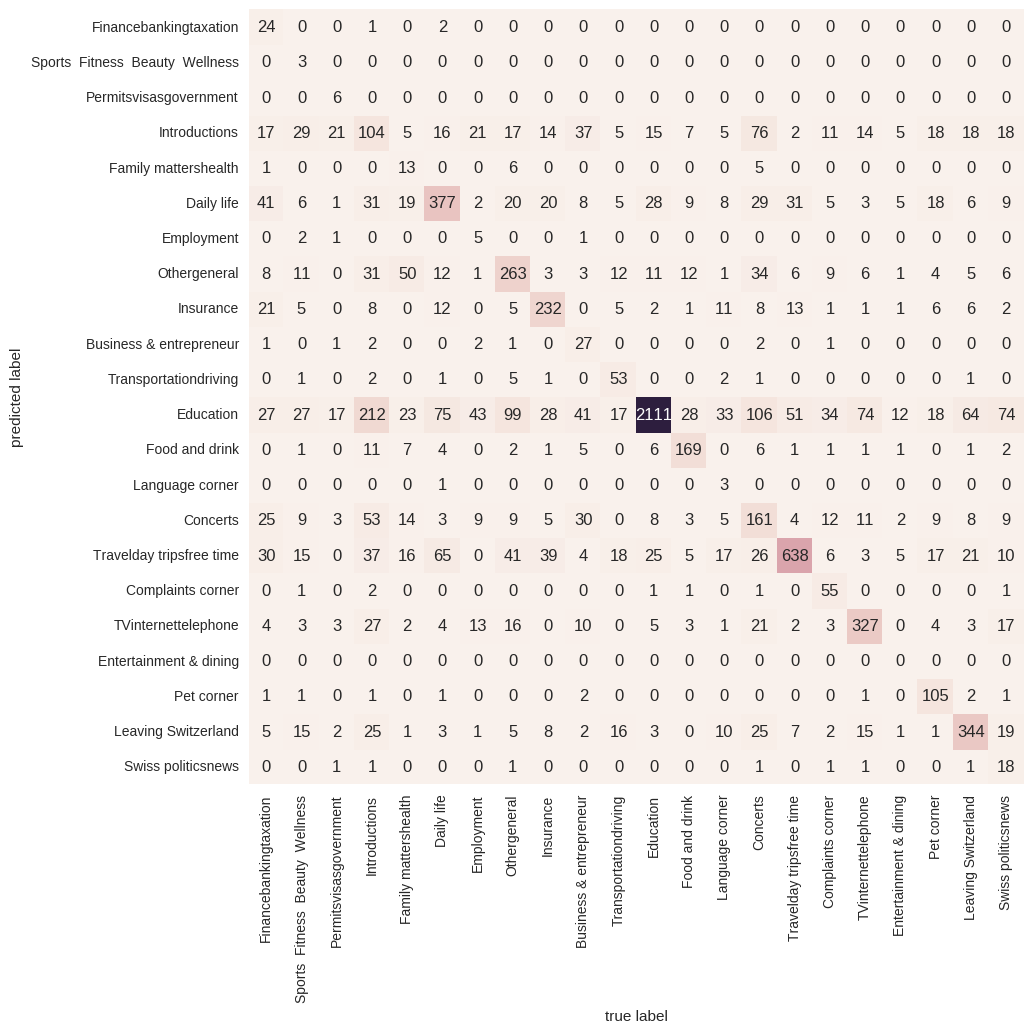

topic values
0 Financebankingtaxation
1 Sports  Fitness  Beauty  Wellness
2 Permitsvisasgovernment
3 Introductions
4 Family mattershealth
5 Daily life
6 Employment
7 Othergeneral
8 Insurance
9 Business & entrepreneur
10 Transportationdriving
11 Education
12 Food and drink
13 Language corner
14 Concerts
15 Travelday tripsfree time
16 Complaints corner
17 TVinternettelephone
18 Entertainment & dining
19 Pet corner
20 Leaving Switzerland
21 Swiss politicsnews
distribution of test
 12    2215
16     755
6      576
4      548
15     502
8      490
23     480
19     457
9      351
13     238
0      205
22     200
24     186
10     170
5      150
17     141
11     131
2      129
7       97
14      96
3       56
21      33
Name: topic, dtype: int64
null accuracy
 12    0.269924
Name: topic, dtype: float64


In [19]:
import seaborn as sns
def findAppearance(obj):
    setTopics=set()
    originalValues=[]
    for i in obj:
        if i not in setTopics:
            originalValues.append(i)
            setTopics.add(i)
    for index,i in enumerate(originalValues):
        originalValues[index]=topic_encoder.inverse_transform(i)
    return originalValues

tickLabels=findAppearance(y_test)
# print(findAppearance(y_pred_class))
# print(topicValues,print(y_pred_class.astype(set)))
# print the confusion matrix
plt.figure(figsize=(10,10))
matrix=metrics.confusion_matrix(y_test, y_pred_class)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=tickLabels, yticklabels=tickLabels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
# examine the class distribution of the testing set
print('topic values')
for index,topic_value in enumerate(tickLabels):
    print(index,topic_value)

print('distribution of test\n',y_test.value_counts())
# calculate null accuracy
print('null accuracy\n',y_test.value_counts().head(1) / y_test.shape)

In [20]:
# first 10 false positives
X_test[y_test < y_pred_class].head(10)

10269           Where to watch the England game in zurich?
39659        Where to Rent Indoor Football Lausanne/Morges
2479                                    Bern area opinions
44780                     Marriage Help - Foreign Resident
47364    Looking For Guitar Teacher in Vevey/Montreux Area
2371           Rental deposit to landlord private account?
24137                     Car in lease and Steuererklärung
50620              Advertising in English speaking circles
19921                                  Two weeks in Zurich
48560                  Swiss Canadian Dual Citizen Divorce
Name: thread, dtype: object

In [21]:
# first 10 false negatives.
X_test[y_test > y_pred_class].head(10)

46765     A year or two off from Swiss school - what age...
101622          Where can I buy car stereo/audio connector?
54133                                  Asian Shop in Luzern
75934                                   Gymnastics in Bern?
104315            Strasbourg to Genoa - Bernard or Gottard?
44639                                  School opportunities
23120     Need suggestions for "real" swiss chalet close...
23025        Switzerland 12th February - 17th February 2010
67583                 The Best Month to move to Switzerland
59688             Good deal from "Die Post" on Ipad 2 and 3
Name: thread, dtype: object

# Let's predict using K-means

In [32]:
dfAuthors['ConcertsAuthors'].head(3)
key

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Concerts,"Switzerland Gigs ""Heads Up""",Yokine,151570,1100,Perthia,"06.05.2009, 16:20",Mod Insert: Please . Can't be bothered si...,1233.0,Mar 2006,5.0,"['901', '444']","['1', '1']",6
1,Concerts,Small bars/places with acoustic livemusic?,JHC,931,5,"Lenzburg, Aargau","19.11.2016, 19:45",\r\n\t\t\t\r\n\t\t\tI am living in Kanton Aar...,3.0,Nov 2016,0.0,"['0', '0']","['0', '0']",0
2,Concerts,Jazz clubs Zurich?,aromeroa,3849,16,Spain,"28.11.2015, 22:48",\r\n\t\t\t\r\n\t\t\tHello there! \r\nI am a...,6.0,Jul 2015,0.0,"['0', '0']","['0', '0']",0


In [23]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn import cross_validation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

k_means=KMeans(n_clusters=16)
# train the model using X_train_dtm
k_means.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = k_means.predict(X_test_dtm)
# calculate accuracy of class predictions
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))
# k_means.fit(X)
# correct=0
# for i in range(len(X)):
#     predict_me=np.array(X[i].astype(float))
# #     print(predict_me,predict_me.shape())
#     predict_me=predict_me.reshape(-1,len(predict_me))
# #     print(predict_me,predict_me.shape())
#     prediction=clf_topic.predict(predict_me)
#     if(prediction[0]==y[i]):
#         correct+=1
# print(correct/len(X))
# dfJoinShuffle_aux

accuracy rate: 0.0247379965879


/home/josele/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [30]:
min_max_scaler = preprocessing.MaxAbsScaler()
# for column in dfJoinShuffle_aux:
#     dfJoinShuffle_aux[column]=np_scaled = min_max_scaler.fit_transform(df)
locationsProc = preprocessing.LabelEncoder()
dfJoinShuffle_aux.location = locationsProc.fit_transform(dfJoinShuffle_aux.location)
print((dfJoinShuffle_aux.groaned.values))
scaled_values = min_max_scaler.fit_transform(dfJoinShuffle_aux.values)
# print(scaled_values)
# dfJoinShuffle_aux.columns
for index,column in enumerate(dfJoinShuffle_aux):
    dfJoinShuffle_aux[column]=pd.DataFrame(scaled_values)[index]
dfJoinShuffle_aux=dfJoinShuffle_aux.dropna()
# =pd.DataFrame(scaled_values)[0]
# dfJoinShuffle_aux['topic']

/home/josele/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


["['195', '121']" "['3', '1']" "['3', '2']" ..., "['2', '2']" "['0', '0']"
 "['0', '0']"]


ValueError: could not convert string to float: "['0', '0']"

In [107]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.decomposition import TruncatedSVD
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# from sklearn.cross_validation import train_test_split

pca_shuffle = TruncatedSVD(n_components=2).fit_transform(X_train_dtm,y_train)

# # Determine your k range
# k_range = range(1,20)

# # Fit the kmeans model for each n_clusters = k
# k_means_var = [KMeans(n_clusters=k).fit(pca_shuffle) for k in k_range]

# # Pull out the cluster centers for each model
# centroids = [X.cluster_centers_ for X in k_means_var]

# # Calculate the Euclidean distance from 
# # each point to each cluster center
# k_euclid = [cdist(pca_shuffle, cent, 'euclidean') for cent in centroids]
# dist = [np.min(ke,axis=1) for ke in k_euclid]

# # Total within-cluster sum of squares
# wcss = [sum(d**2) for d in dist]

# # The total sum of squares
# tss = sum(pdist(pca_shuffle)**2)/pca_shuffle.shape[0]

# # The between-cluster sum of squares
# bss = tss - wcss

# # elbow curve
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(k_range, bss/tss*100, 'b*-')
# ax.set_ylim((0,100))
# plt.grid(True)
# plt.xlabel('n_clusters')
# plt.ylabel('Percentage of variance explained')
# plt.title('Variance Explained vs. k')
# plt.show()
# # print(pca_shuffle.shape[0],pca_shuffle.shape[1],fit1,len(fit1),dfJoinShuffle_aux.values)
# silhouette_score(fit, k_means_var[-1].labels_, metric='euclidean')
# # # fit.shape

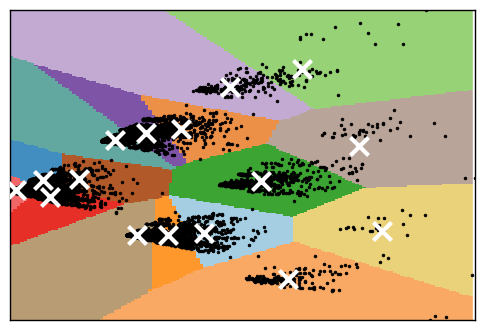

In [31]:
# run 8/random, 7/kmeans++ for silhouette
k_means = KMeans(n_clusters=16)
k_means.fit(pca_shuffle)

x_min, x_max = pca_shuffle[:, 0].min(), pca_shuffle[:, 0].max()
y_min, y_max = pca_shuffle[:, 1].min(), pca_shuffle[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(pca_shuffle[:, 0], pca_shuffle[:, 1], 'k.', markersize=4)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
#silhouette_score(pca_shuffle,k_means.labels_, metric='euclidean') --> kernel breaks

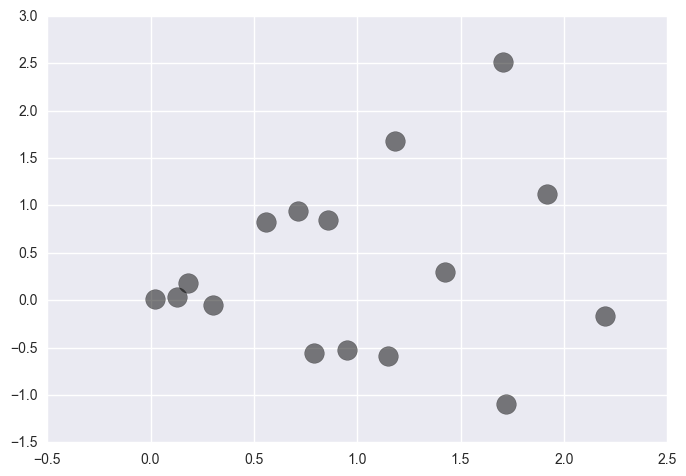

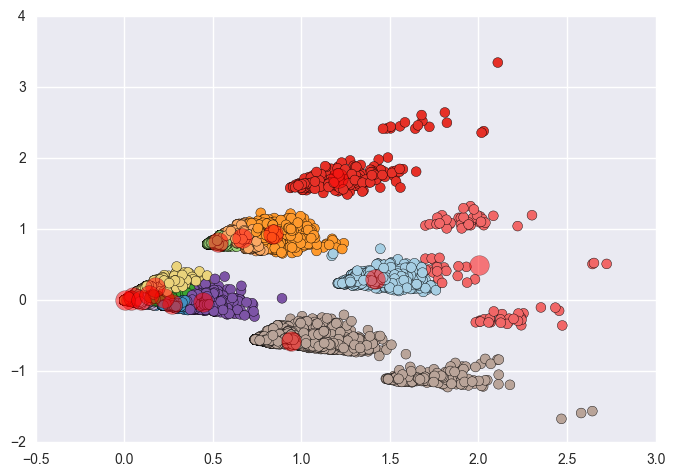

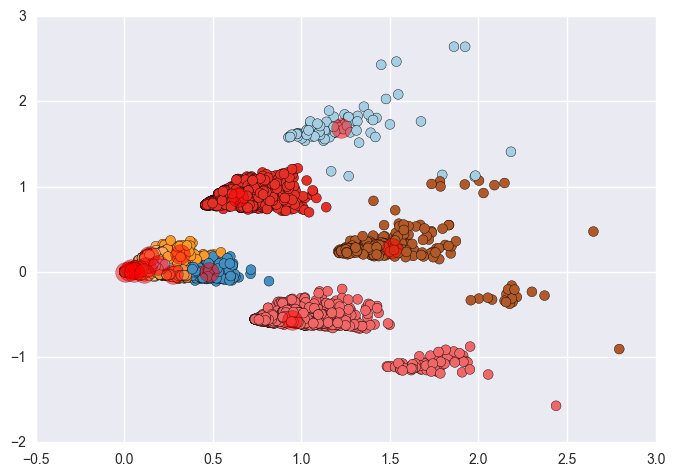

accuracy rate: 0.0377312560857


In [108]:
from sklearn.metrics import pairwise_distances_argmin
expectedPrediction=dfJoinShuffle['topic']
# min_max_scaler = preprocessing.MaxAbsScaler()

kmeans = KMeans(n_clusters=16)
kmeans.fit(pca_shuffle)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()
# method to readjust the cluster centers in order to optimize the minimum distance between centers
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest centersilhouette_score(pca_shuffle, labels, metric='euclidean')
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(pca_shuffle, 16)
plt.scatter(pca_shuffle[:, 0], pca_shuffle[:, 1], c=labels,s=50, cmap=plt.cm.Paired);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()
pca_shuffle_test = TruncatedSVD(n_components=2).fit_transform(X_test_dtm)

prediction=kmeans.predict(pca_shuffle_test)
centers, labels = find_clusters(pca_shuffle_test, 16)
plt.scatter(pca_shuffle_test[:, 0], pca_shuffle_test[:, 1], c=labels,
            s=50,cmap=plt.cm.Paired);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()
print('accuracy rate:',metrics.accuracy_score(y_test, prediction))